# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Exercise 11.1

We start by considering the very simple case:
$$
f(x)=2x+1
$$
In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

---
### Risoluzione
---

In questo esercizio ho implementato una **Neural Network** formata da un singolo neurone in cui gli unici due parametri *bias* e *peso* verranno ottimizzati al fine di effettuare un **fit lineare** della $f(x)$. Per fare ciò ho esplorato una piccola regione dello spazio degli **iper-parametri**:
- $N_{epoche}=[10,30,50]$
- $N_{train}=[300,600,1200,2400]$
- $\sigma=[0.05,0.1,0.2,0.5]$

I seguenti iper-parametri sono invece stati mantenuti costanti:
- $N_{valid}=70$
- $1$ layer da $1$ neurone
- funzione d'attivazione 'lineare'
- ottimizzatore `sgd`
- loss e metrica `mse`
- batch_size = $32$

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

Preparo il dataset *target*

In [157]:

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
# generate training inputs
np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 70)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function


In [158]:
n_tr = [300,600,1200,2400]
n_ep = [10,30,50]
s = [0.05,0.1,0.2,0.5]
l_tr = len(n_tr)
l_ep = len(n_ep)
l_s = len(s)

In [159]:
model = [[[]]]
history = [[[]]]

Prepato i dataset di *training* e *validazione*

In [160]:
x_train =[]
for k in range(0,l_tr):
    x_train.append(np.random.uniform(-1, 1, n_tr[k]))
y_train = [[]]
y_valid = [[]]
for k in range(0,l_tr):
    y_train.append([])
    y_valid.append([])
    for j in range(0,l_s):
        y_train[k].append(np.random.normal(m * x_train[k] + b, s[j])) # actual measures from which we want to guess regression parameters
        y_valid[k].append(np.random.normal(m * x_valid + b, s[j]))


Inizializzo i modelli

In [161]:
# compose the NN model

for k in range(0,l_tr):
    model.append([])
    for j in range(0,l_s):
        model[k].append([])
        for i in range(0,l_ep):
            model[k][j].append(tf.keras.Sequential())
            model[k][j][i].add(Dense(1, input_shape=(1,)))

            # compile the model choosing optimizer, loss and metrics objects
            model[k][j][i].compile(optimizer='sgd', loss='mse', metrics=['mse'])

/Users/giovannigalafassi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Alleno le **NN** con i differenti iper-parametri

In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
for k in range(0,l_tr):
    history.append([])
    for j in range(0,l_s):
        history[k].append([])
        for i in range(0,l_ep):
            history[k][j].append([])
            history[k][j][i]=model[k][j][i].fit(x=x_train[k], y=y_train[k][j], batch_size=32, epochs=n_ep[i],shuffle="True", validation_data=(x_valid, y_valid[k][j]),verbose=0)
            model[k][j][i].save('LINEAR/linear_'+str(k)+'_'+str(j)+'_'+str(i)+'.keras')


Oppure le carico se sono già state allenate

In [163]:
for k in range(0,l_tr):
    for j in range(0,l_s):
        for i in range(0,l_ep):
            model[k][j][i]= keras.models.load_model('LINEAR/linear_'+str(k)+'_'+str(j)+'_'+str(i)+'.keras')

In [164]:
score = [[[]]]
for k in range(0,l_tr):
    score.append([])
    for j in range(0,l_s):
        score[k].append([])
        for i in range(0,l_ep):
            score[k][j].append(model[k][j][i].evaluate(x_valid, y_valid[k][j], batch_size=32, verbose=0))

In [165]:
scor_e = [[[]]]
for k in range(0,l_tr):
    scor_e.append([])
    for j in range(0,l_s):
        scor_e[k].append([])
        for i in range(0,l_ep):
            scor_e[k][j].append(model[k][j][i].evaluate(x_valid, y_target, batch_size=32, verbose=0))

In [184]:
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Osserviamo l'andamento della **Loss** nel *train* e nel *test*:

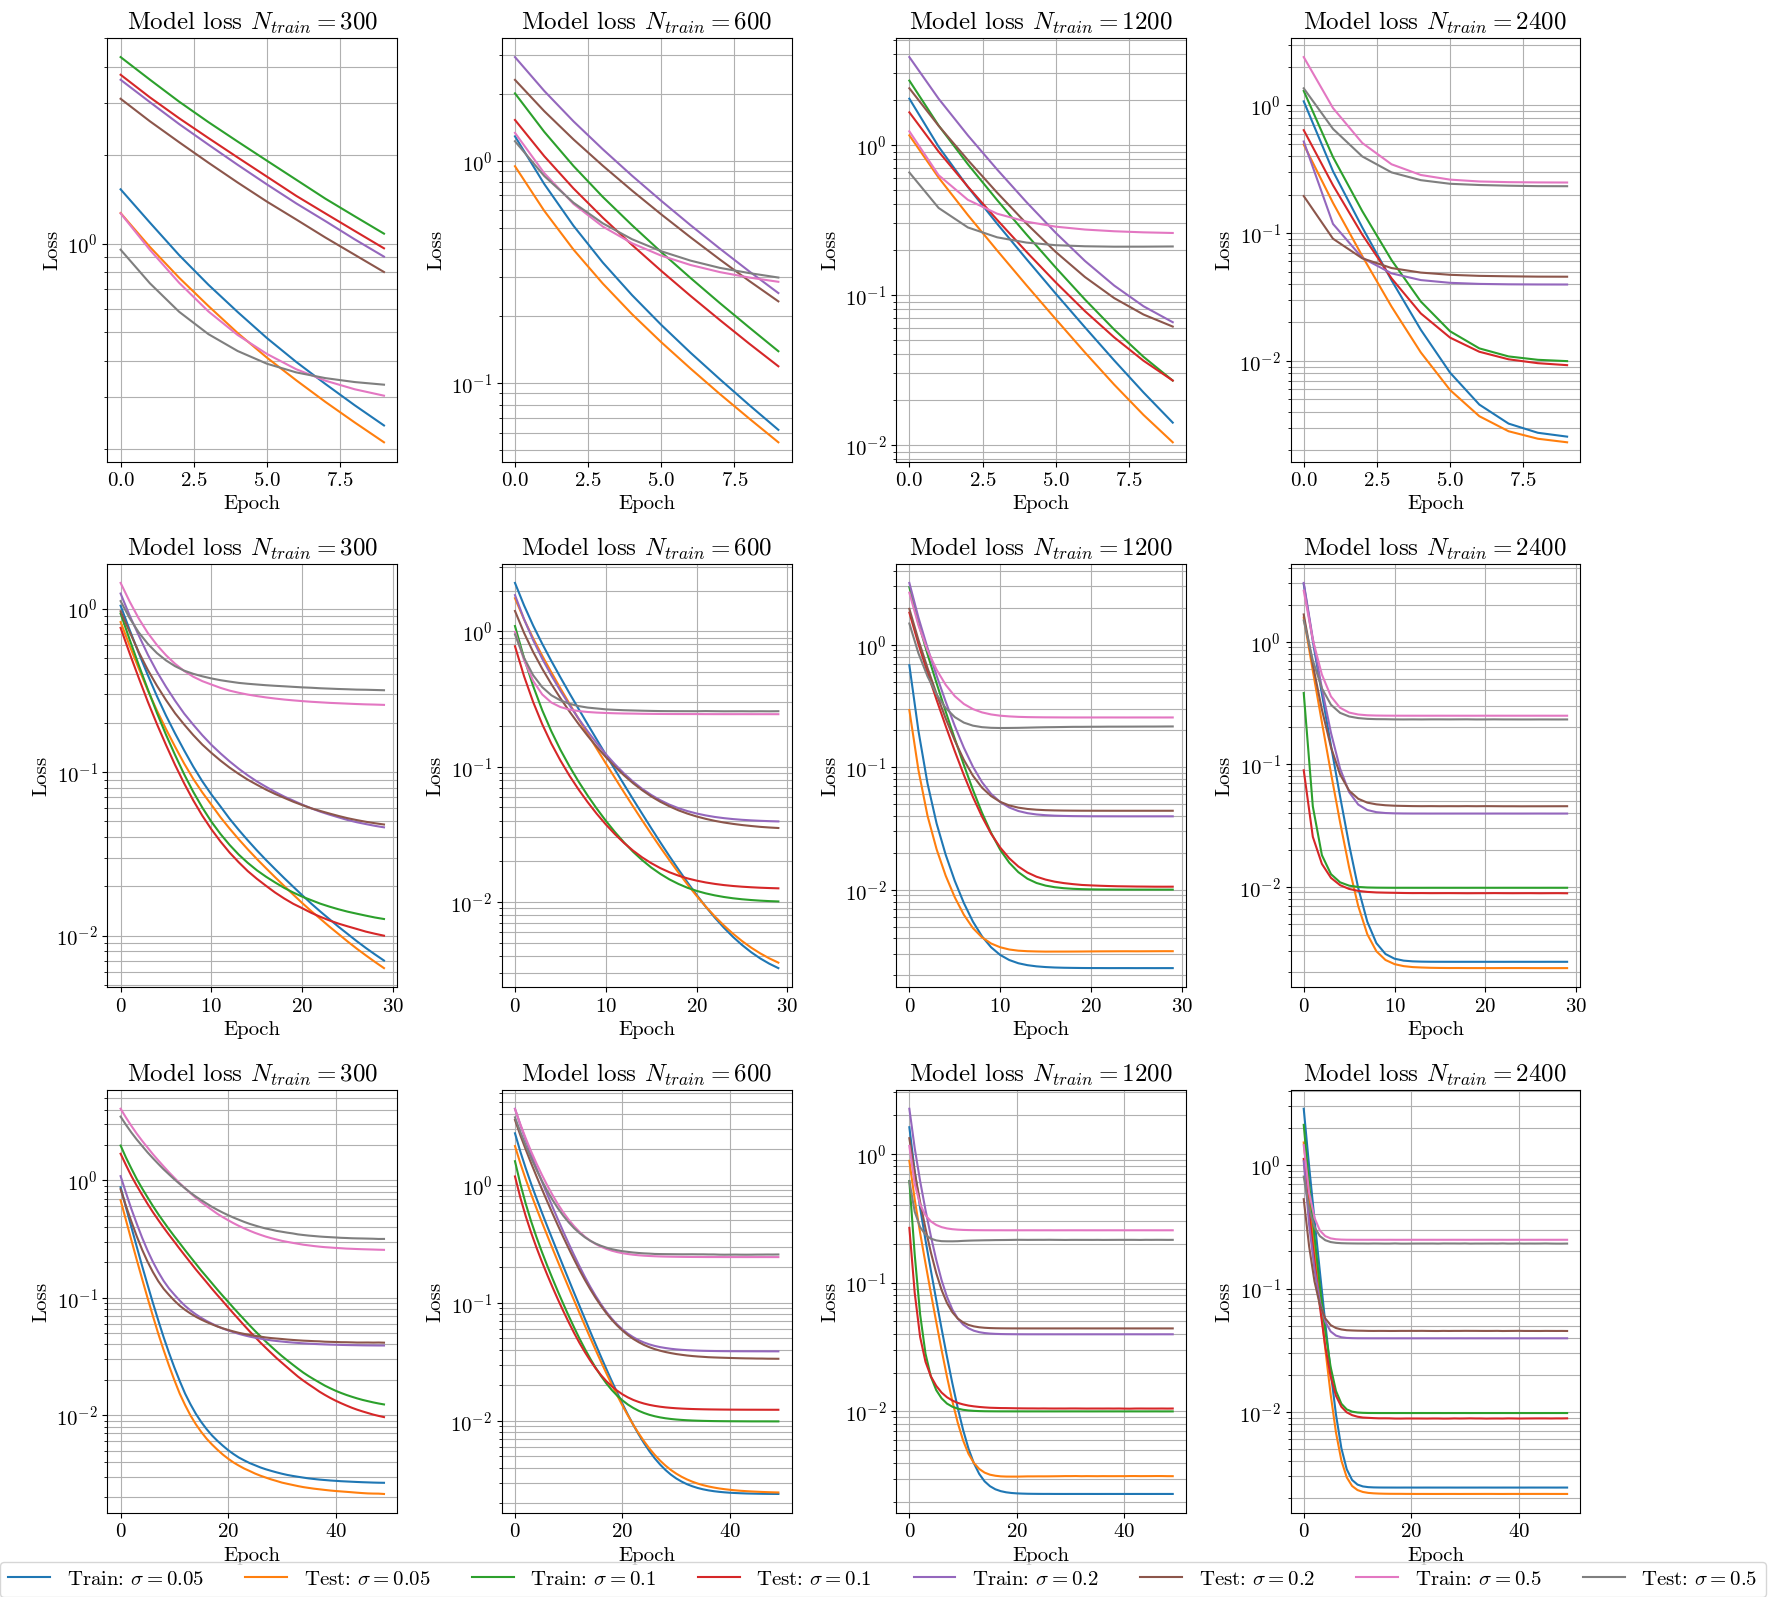

In [168]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(16,16))
for k in range(0,l_tr):
    for i in range(0,l_ep):
        plt.subplot(l_ep,l_tr,l_tr*(i) +k+1)
        for j in range(0,l_s):
            if (i==0 and k==0):
                plt.plot(history[k][j][i].history['loss'],label='Train: $\sigma=$'+str(s[j]))
                plt.plot(history[k][j][i].history['val_loss'],label='Test: $\sigma=$'+str(s[j]))
            else:
                plt.plot(history[k][j][i].history['loss'])
                plt.plot(history[k][j][i].history['val_loss'])  
        plt.title('Model loss $N_{train}=$'+str(n_tr[k]))
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.yscale('log')
        plt.grid(True,which='both')
plt.figlegend(ncol=l_s*2,loc=(0,-0.00))
plt.tight_layout()
plt.show()

Si può ossere facilmente come l'aumento del rumore $\sigma$ comporti una **Loss** raggiunta a termine di *train* e *test* maggiore. Il maggior numero di punti su cui è effettuato il **train** riduce il numero di epoche necessarie per arrivare alla loss minima. Per i valori di $\sigma$ e $N_{train}$ esplorati non sono quindi necessarie più di $30$ epoche tranne al massimo nel caso di $N_{train}=300$.

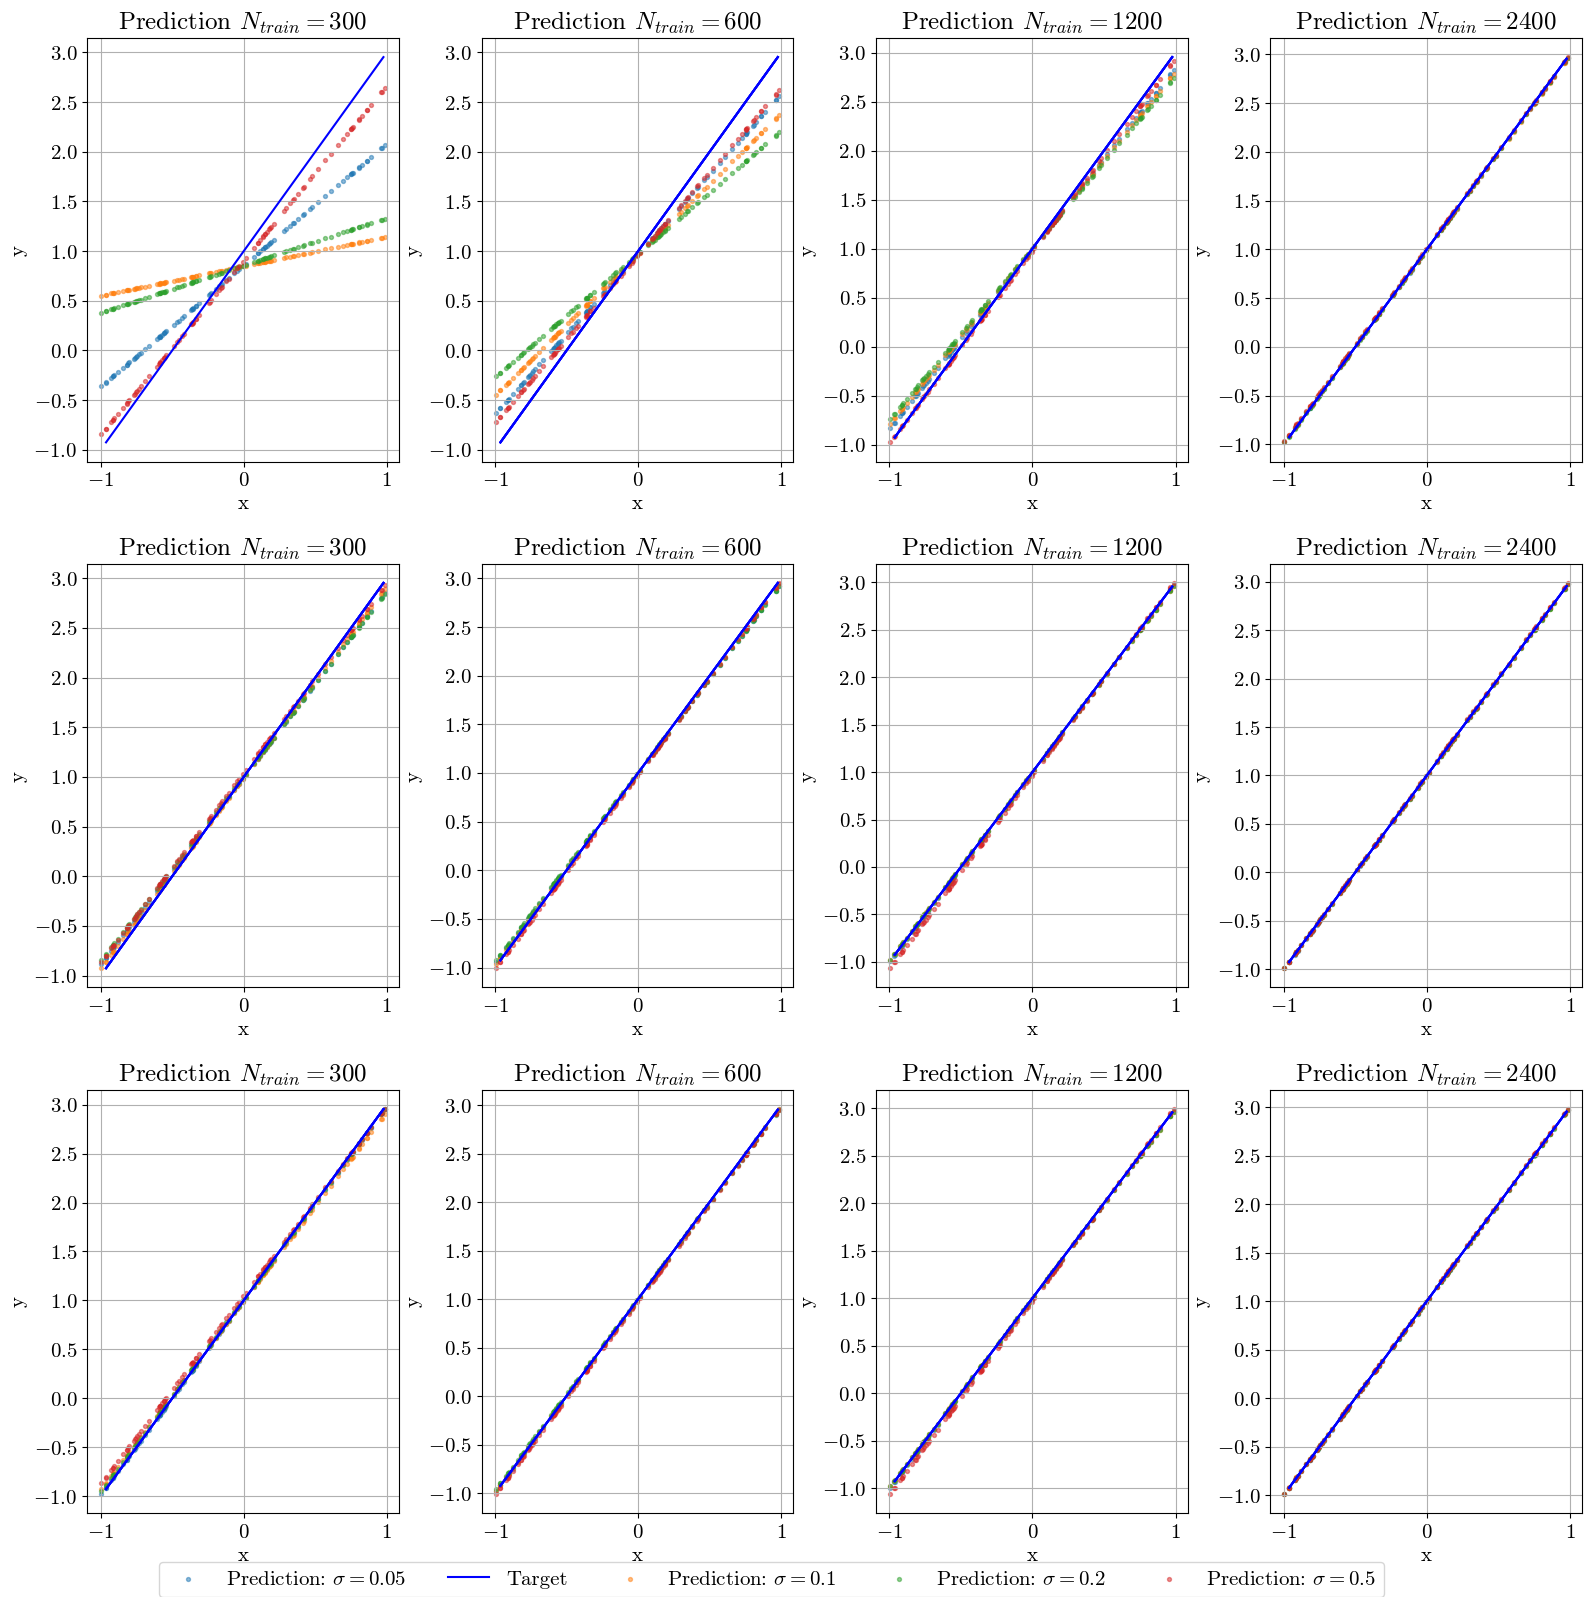

In [183]:
x_predicted = np.random.uniform(-1, 1, 100)
y_pred = [[[]]]
plt.figure(figsize=(16,16))
for k in range(0,l_tr):
    y_pred.append([])
    for i in range(0,l_ep):
        y_pred[k].append([])
        plt.subplot(l_ep,l_tr,l_tr*(i) +k+1)
        for j in range(0,l_s):
            y_pred[k][i].append(model[k][j][i].predict(x_predicted,verbose=0))
            if (i==0 and k==0):
                plt.scatter(x_predicted, y_pred[k][i][j],label='Prediction: $\sigma=$'+str(s[j]),s=8,alpha=0.5)
                if(j==0):
                    plt.plot(x_valid, y_target,color='b',label='Target')
            else:
                plt.scatter(x_predicted, y_pred[k][i][j],s=8,alpha=0.5)
                plt.plot(x_valid, y_target,color='b')
        plt.title('Prediction $N_{train}=$'+str(n_tr[k]))
        plt.ylabel('y')
        plt.xlabel('x')
        #plt.yscale('log')
        plt.grid(True,which='both')
plt.figlegend(ncol=l_s+1,loc=(0.1,-0.00))
plt.tight_layout()
plt.show()

Osserviamo che $10$ epoche sono sufficienti per avere una buona previsione solo nel caso in cui $N_{train}=2400$. In generale $50$ epoche sono sovrabbondanti poichè in tutti i casi con $30$ epoche si raggiunge una buona predizione.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

---
### Risoluzione
---

Per la risoluzione di questo esercizio ho creato diverse **NN** in cui ho variato per confrontarli i seguenti iper-parametri:
- $N_{layer}=[1,2,3]$
- il numero di neuroni per layer $N_{neuroni}=[12,24,36]$
- la funzione di attivazione [`softsign`,`relu`,`sigmoid`]
- l'ottimizzatore [`sgd`,`adam`]
- la loss function [`mse`,`mae`,`msle`]

Ogni **NN** presenta infine un layer di output formato da un neurone con attivazione lineare. Altri iper-parametri mantenuti costanti sono:
- il numero di punti di train $N_{train}=600$
- il numero di punti di test $N_{test}=70$
- il rumore $\sigma=0.05$
- le epoche $50$

In [254]:
# parameters
a = 3
b = -2
c = -3
d = 4
def f(x):
    return a * x**3 + b * x**2 + c * x + d

In [255]:
n_lay = [1,2,3]
n_ne = [12,24,36]
act = ['softsign','relu','sigmoid']
opt = ['sgd','adam']
los = ['mse','mae','msle']
l_lay = len(n_lay)
l_ne = len(n_ne)
l_act = len(act)
l_opt = len(opt)
l_ls = len(los)

In [256]:

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 600)
#x_train[3000:] = np.random.uniform(0.7,1,2000)
x_valid = np.random.uniform(-1, 1, 70)
x_valid.sort()
y_target = f(x_valid)

sigma = 0.05 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

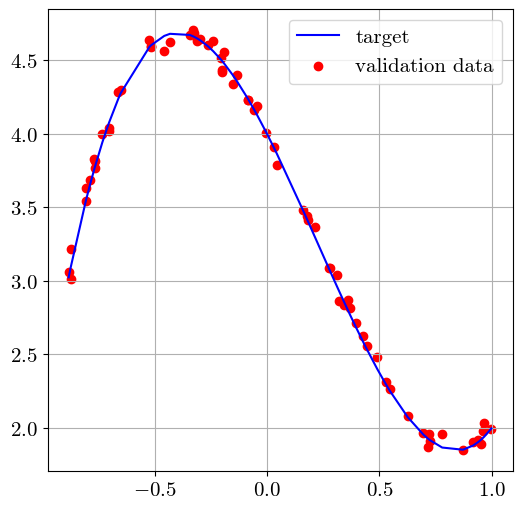

In [257]:
plt.plot(x_valid, y_target,color='b', label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid()
plt.show()

In [258]:
m1 = [[[[[]]]]]
h1 = [[[[[]]]]]

In [259]:
for i in range(0,l_opt):
    m1.append([])
    h1.append([])
    for j in range(0,l_ls):
        m1[i].append([])
        h1[i].append([])
        for k in range(0,l_lay):
            m1[i][j].append([])
            h1[i][j].append([])
            for l in range(0,l_ne):
                m1[i][j][k].append([])
                h1[i][j][k].append([])
                for m in range(0,l_act):
                    m1[i][j][k][l].append(tf.keras.Sequential())
                    h1[i][j][k][l].append([])
for i in range(0,l_opt):
    for j in range(0,l_ls):
        for k in range(0,l_lay):
            for l in range(0,l_ne):
                for m in range(0,l_act):
                    m1[i][j][k][l][m].add(Dense(n_ne[l],input_shape=(1,),activation=act[m]))
                    for re in range(0,n_lay[k]-1):
                        m1[i][j][k][l][m].add(Dense(n_ne[l],input_shape=(n_ne[l],),activation=act[m]))
                    m1[i][j][k][l][m].add(Dense(1))

                    m1[i][j][k][l][m].compile(optimizer=opt[i],loss=los[j],metrics=['mse'])


/Users/giovannigalafassi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
for i in range(0,l_opt):
    for j in range(0,l_ls):
        for k in range(0,l_lay):
            for l in range(0,l_ne):
                for m in range(0,l_act):
                    h1[i][j][k][l][m] = m1[i][j][k][l][m].fit(x=x_train, y=y_train, batch_size=32, epochs=50,shuffle=True,validation_data=(x_valid, y_valid),verbose=0)
                    m1[i][j][k][l][m].save('POLYNOMIAL/polynomial_'+str(i)+'_'+str(j)+'_'+str(k)+'_'+str(l)+'_'+str(m)+'.keras')

In [ ]:
for i in range(0,l_opt):
    for j in range(0,l_ls):
        for k in range(0,l_lay):
            for l in range(0,l_ne):
                for m in range(0,l_act):
                    m1[i][j][k][l][m]=keras.models.load_model('POLYNOMIAL/polynomial_'+str(i)+'_'+str(j)+'_'+str(k)+'_'+str(l)+'_'+str(m)+'.keras')

In [ ]:
for i in range(0,l_opt):
    for j in range(0,l_ls):
        for k in range(0,l_lay):
            for l in range(0,l_ne):
                for m in range(0,l_act):
                    score1 = m1[i][j][k][l][m].evaluate(x_valid, y_target, batch_size=32, verbose=0)
                    print('Modello polynomial_'+str(opt[i])+'_'+str(los[j])+'_'+str(n_lay[k])+'_'+str(n_ne[l])+'_'+str(act[m])+': loss ',score1[0],', accuracy ',score1[1])


Una volta allenati modelli osserviamo l'andamento di `metrics = mse` lungo le epoche. Ciò ci permette di confrontare tra di loro anche i modelli che hanno minimiizzato funzioni **Loss** diverse. Bisogna far attenzione a non confrontare direttamente la loss

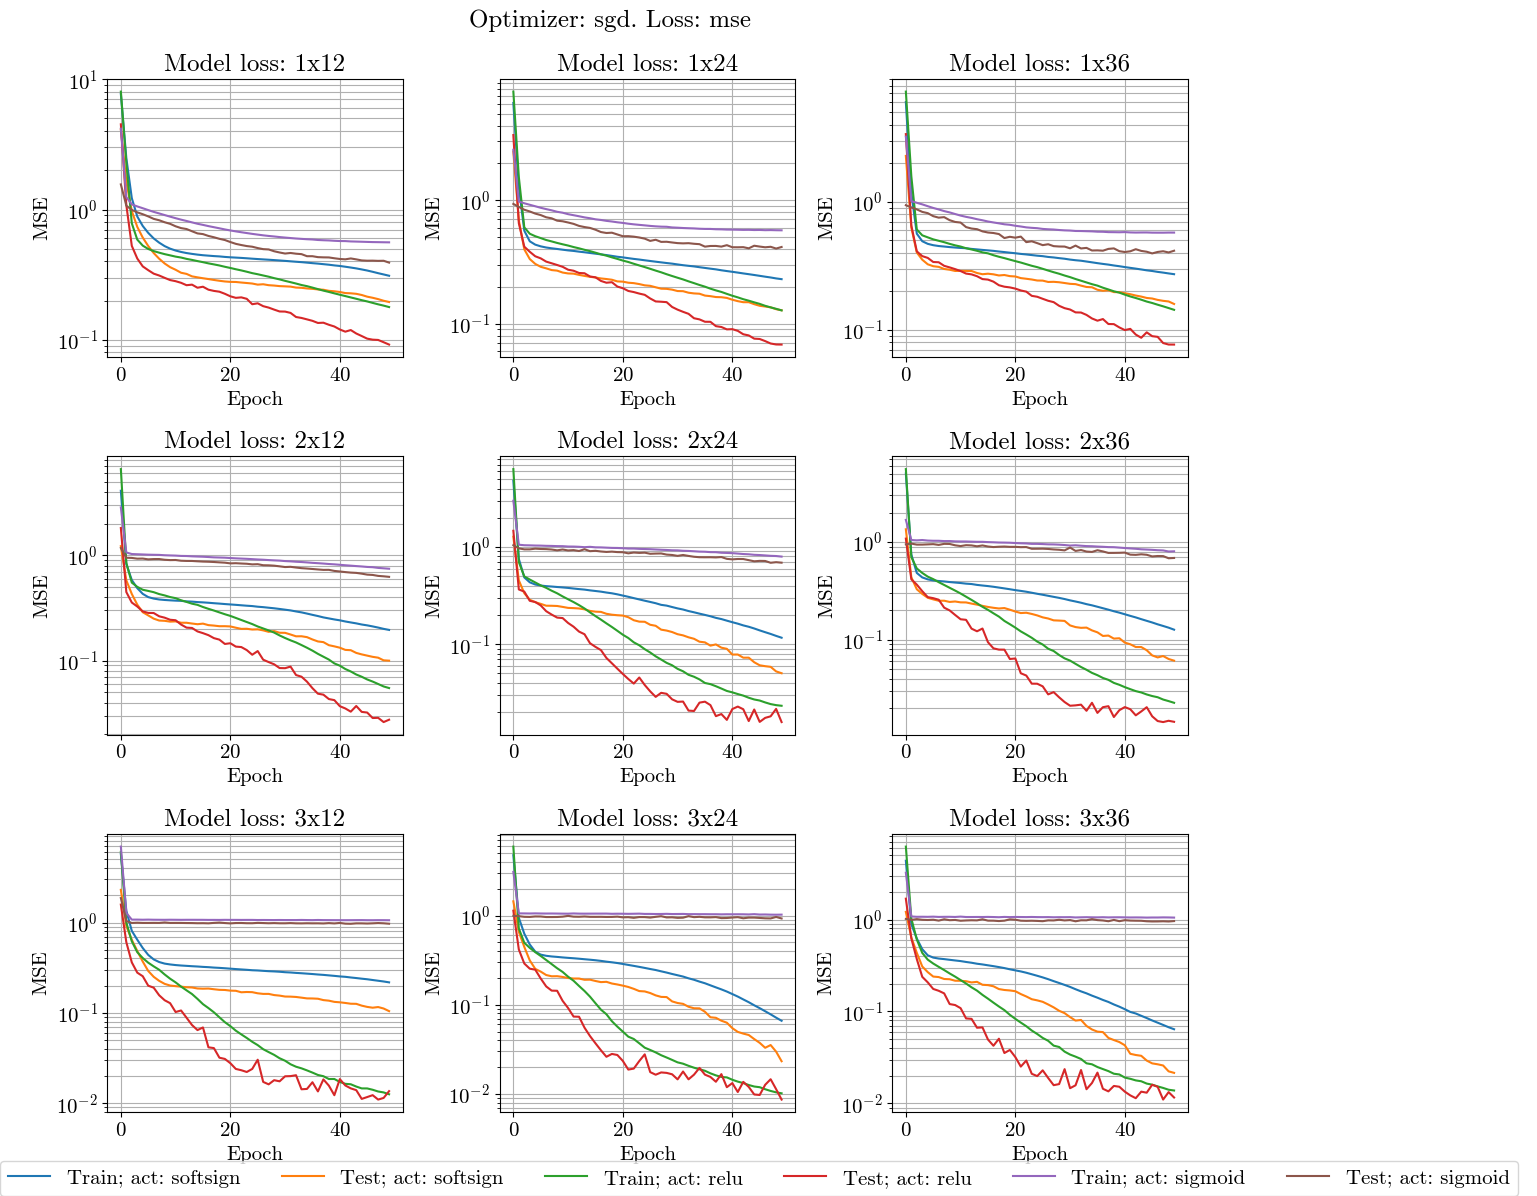

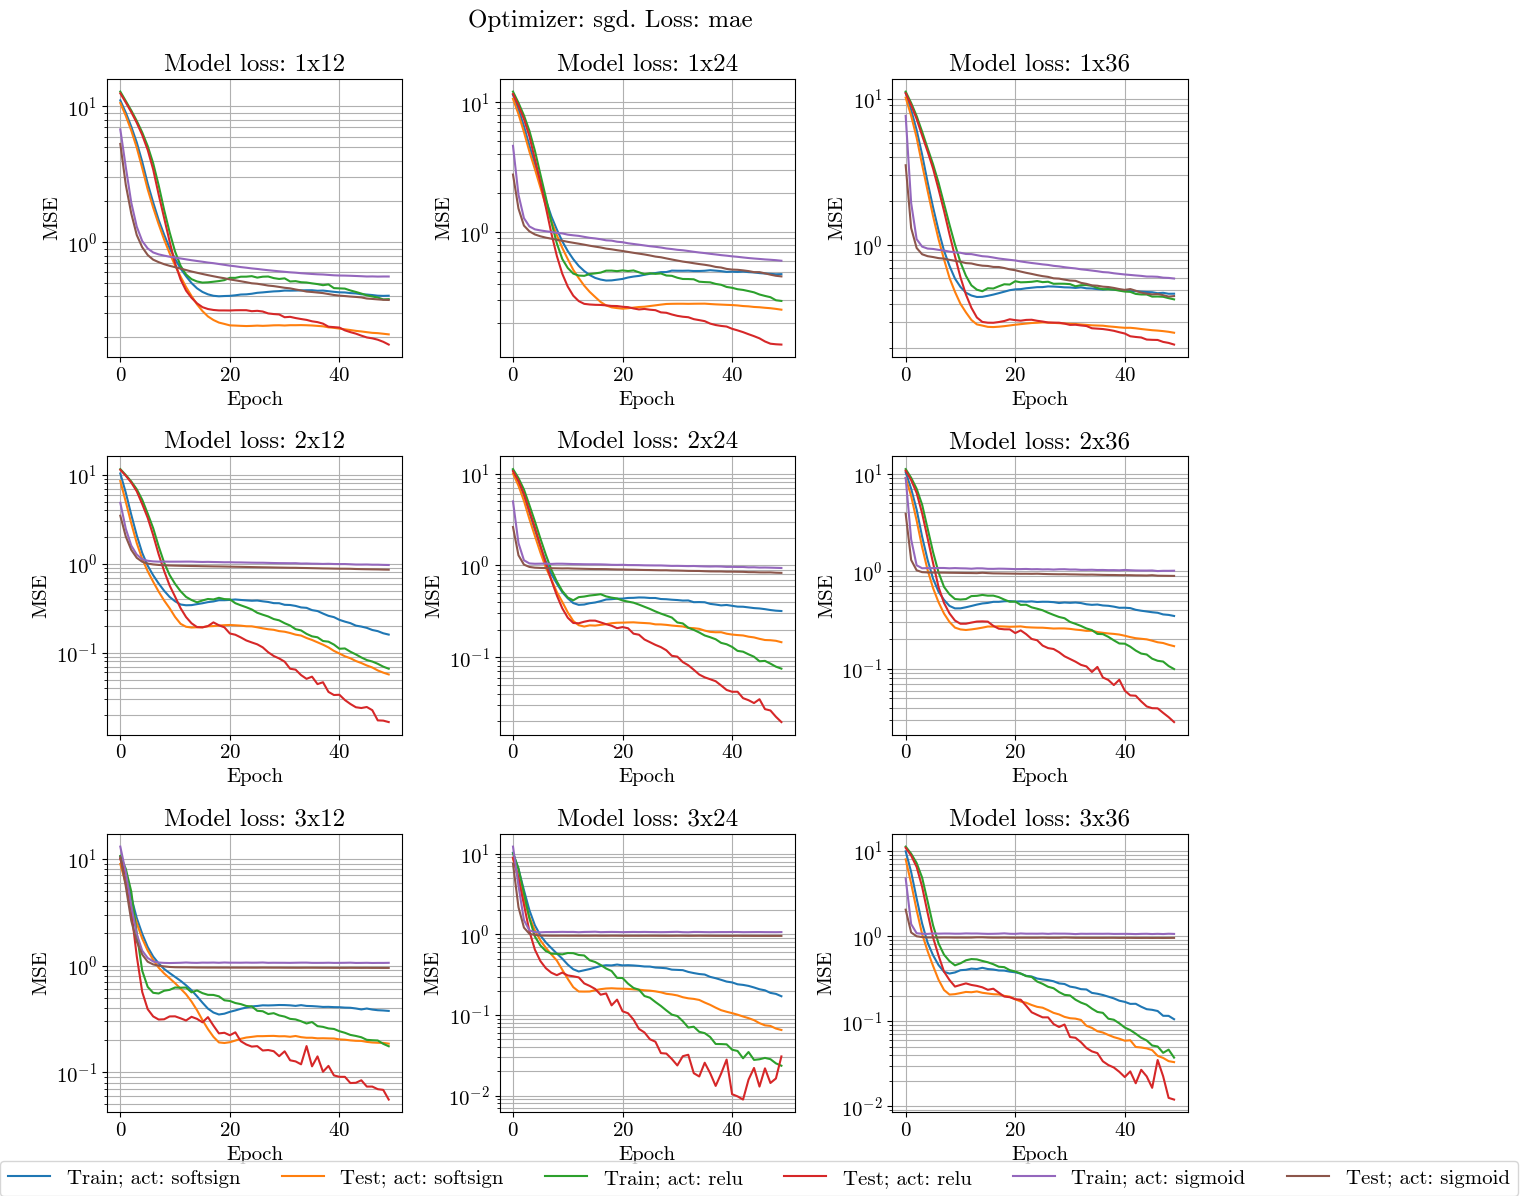

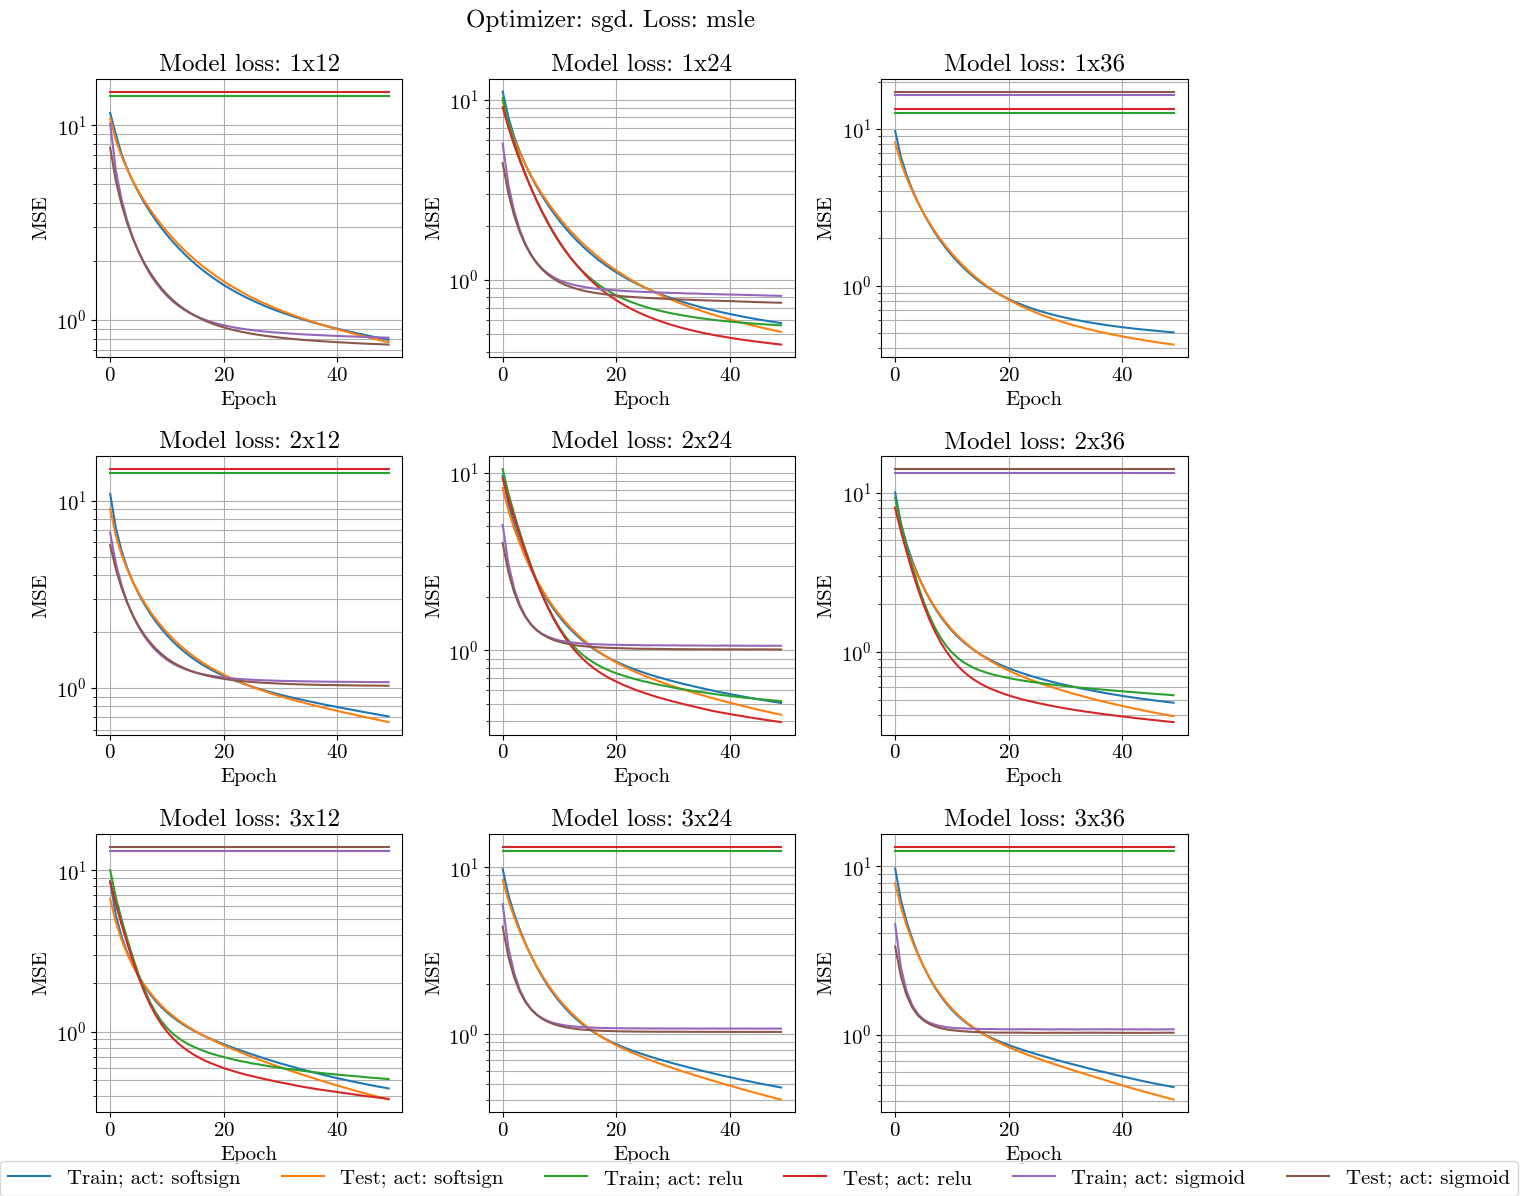

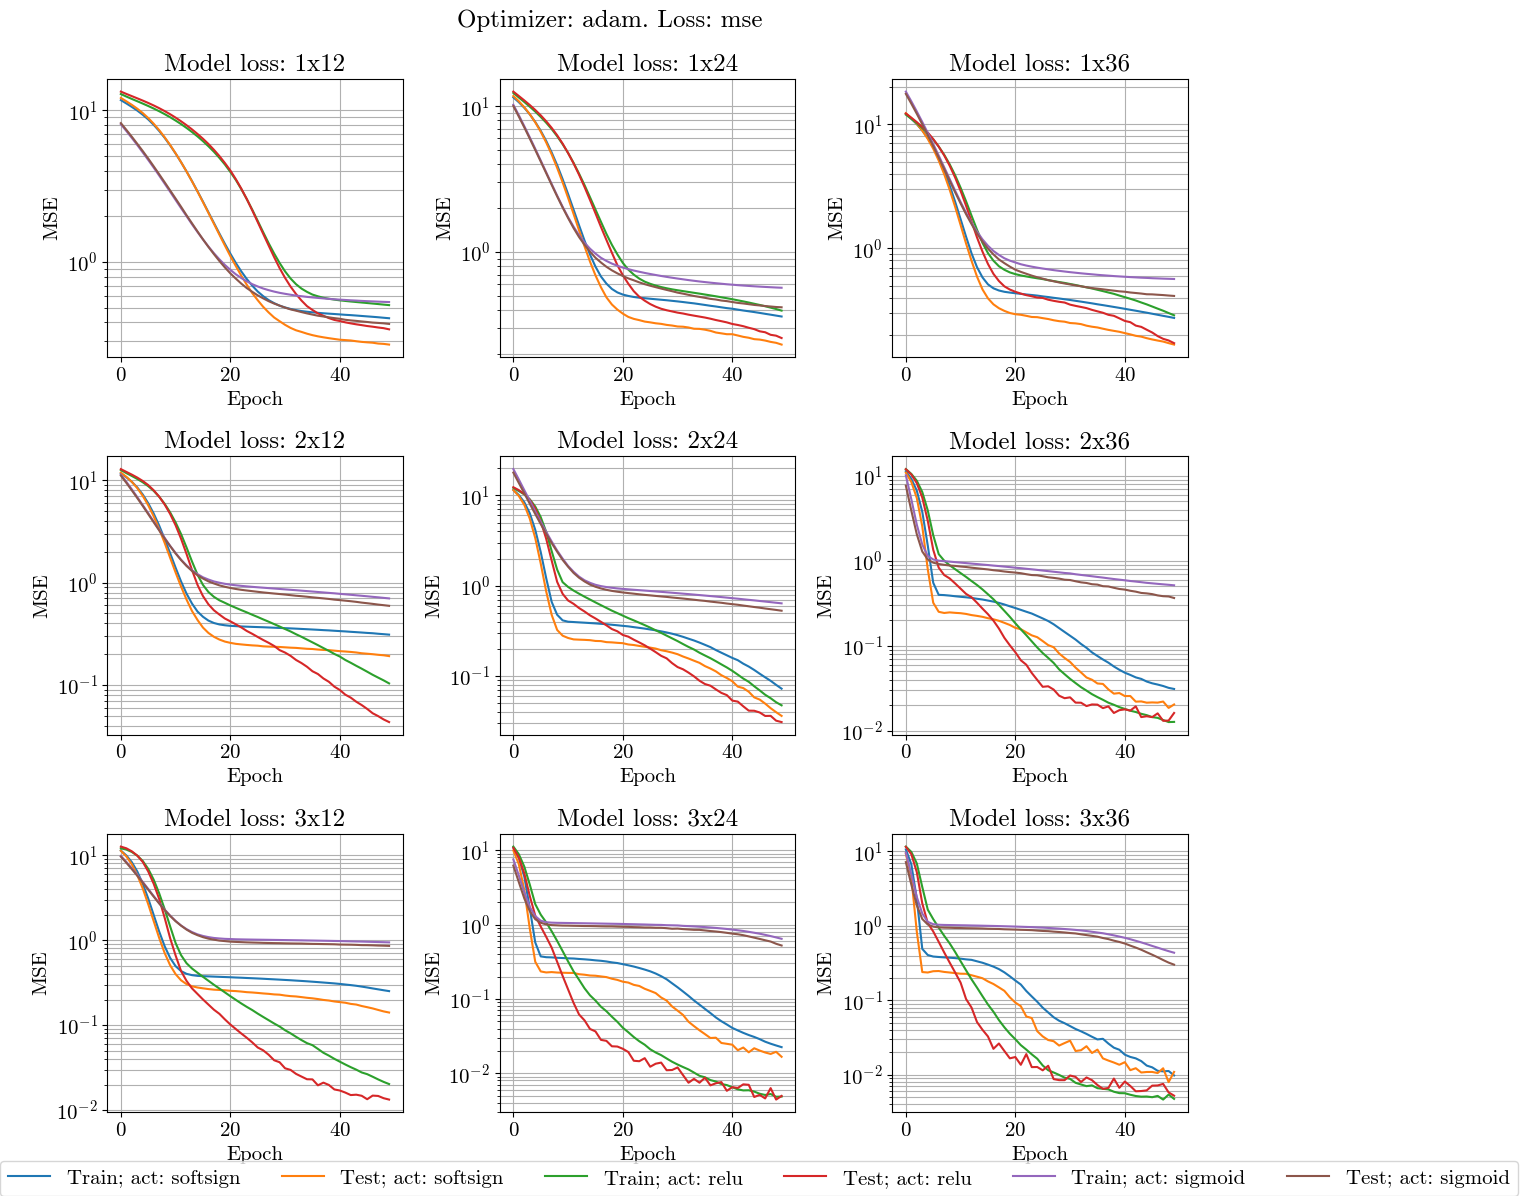

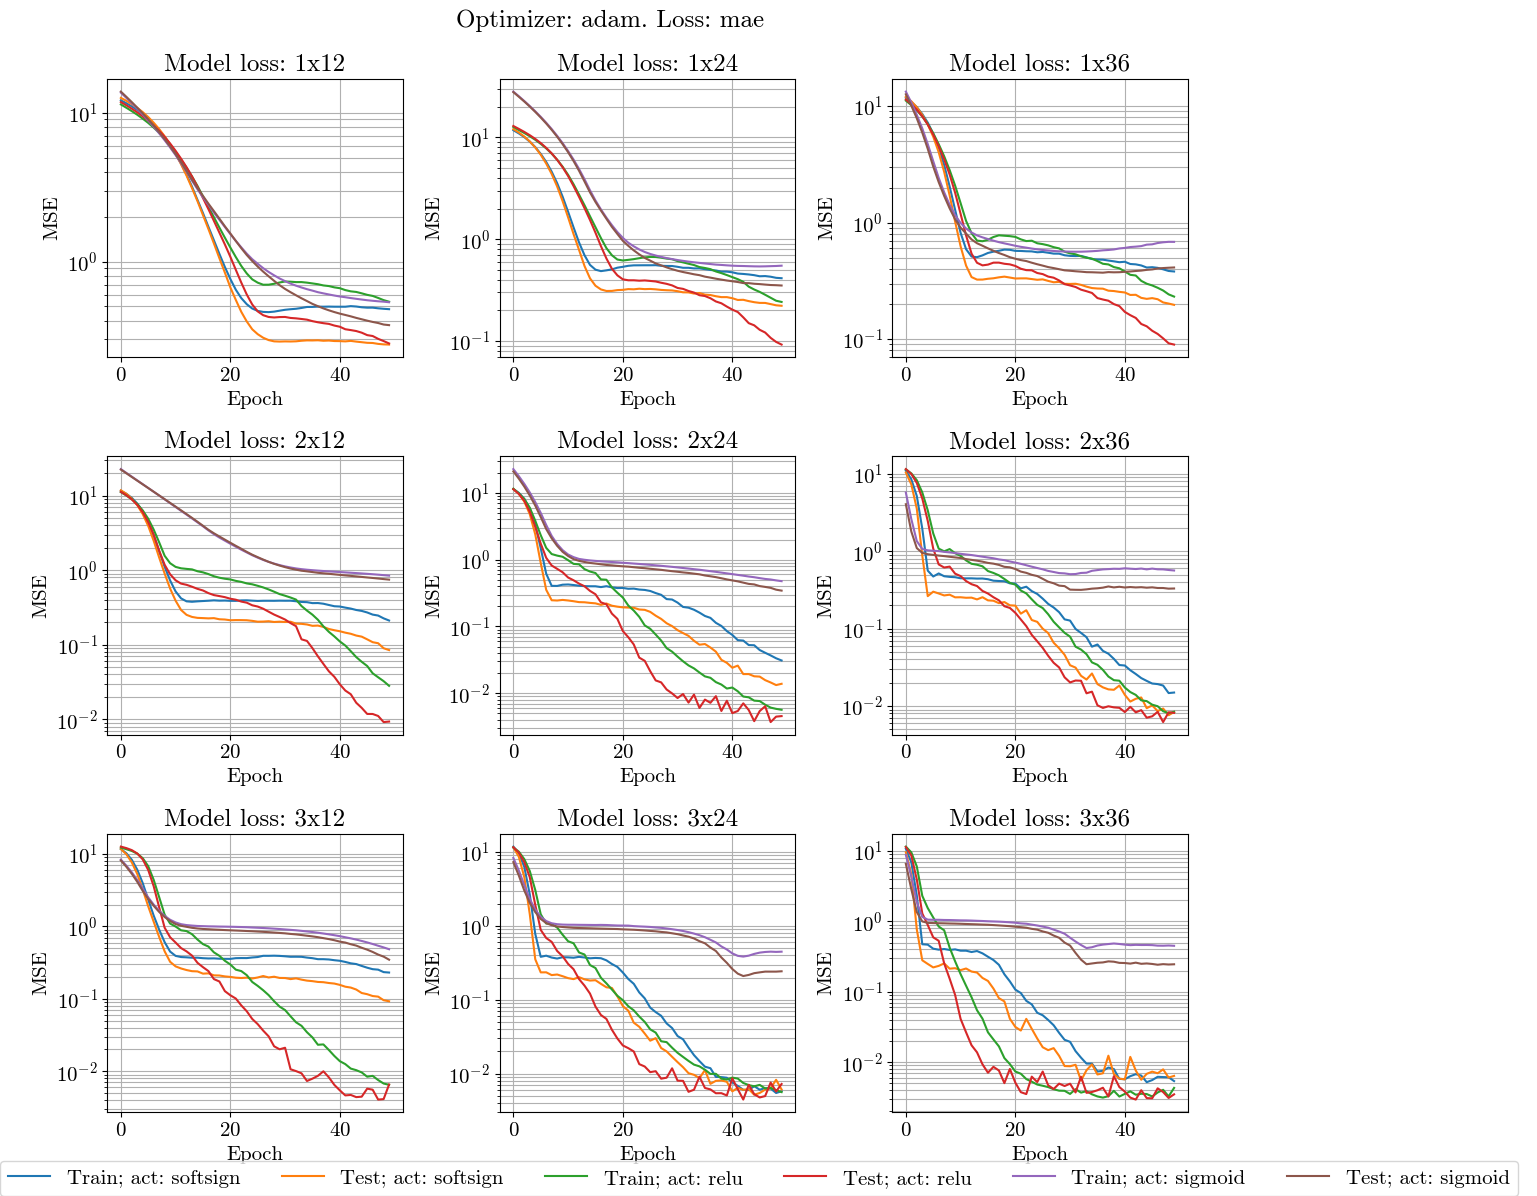

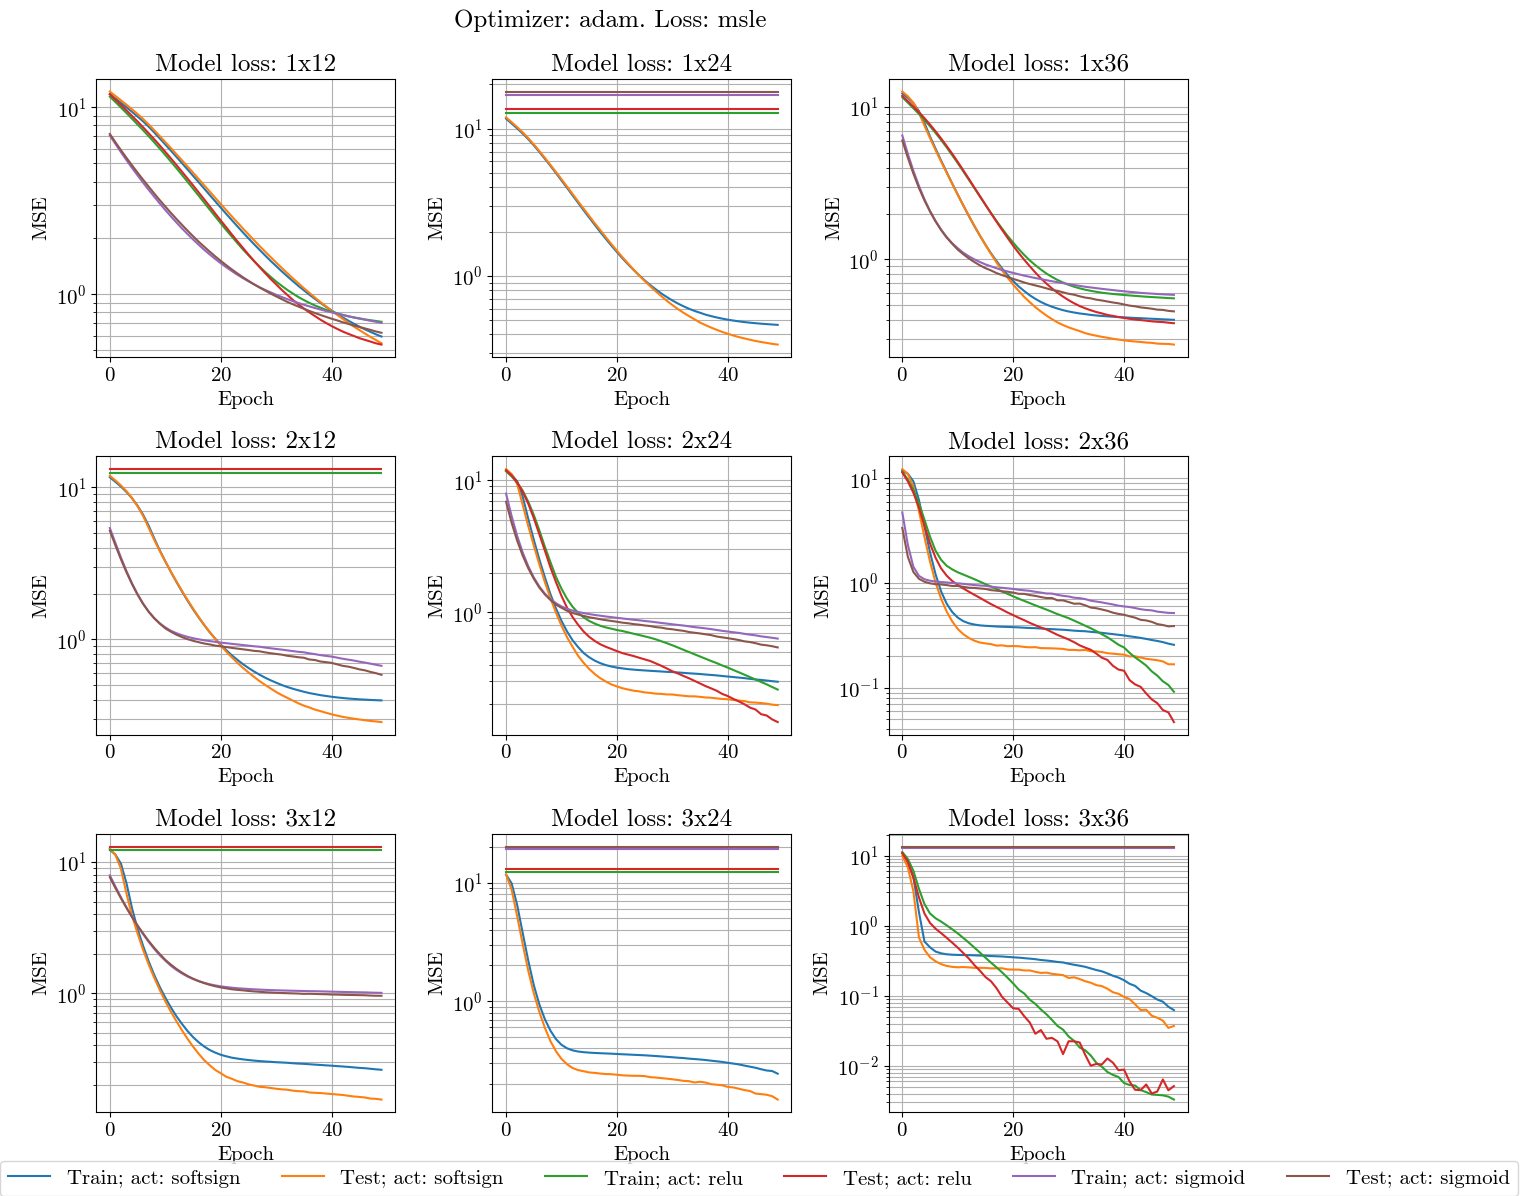

In [263]:
# look into training history
# Plot training & validation loss values
for i in range(0,l_opt):
    for j in range(0,l_ls):
        plt.figure(figsize=(12,12))
        for k in range(0,l_lay):
            for l in range(0,l_ne):
                plt.subplot(l_lay,l_ne,l_ne*k+l+1)
                for m in range(0,l_act):
                    if(k==0 and l==0):
                        plt.plot(h1[i][j][k][l][m].history['mse'],label='Train; act: '+str(act[m]))
                        plt.plot(h1[i][j][k][l][m].history['val_mse'],label='Test; act: '+str(act[m]))
                    else:
                        plt.plot(h1[i][j][k][l][m].history['mse'])
                        plt.plot(h1[i][j][k][l][m].history['val_mse'])
                plt.title('Model loss: '+str(n_lay[k])+'x'+str(n_ne[l]))
                plt.ylabel('MSE')
                plt.xlabel('Epoch')
                #plt.legend(['Train', 'Test'], loc='best')
                plt.grid(True,which='both')
                plt.yscale('log')
        plt.figlegend(loc=(0,0),ncol=l_act*2)
        plt.suptitle('Optimizer: '+str(opt[i])+'. Loss: '+str(los[j]))
        plt.tight_layout()
        plt.show()

In generale si può osservare che l'ottimizzatore `Adam` raggiunge valori di loss migliori di `sgd` e che la funzione di attivazione `softsign` ottiene dei risultati simili e talvolta migliori di `relu` laddove invece `sigmoid` spesso non converge.
Osservando tutte le combinazioni il modello che raggiunge la miglior **Metrica mse** è descritto dai seguenti iper-parametri:
- ottimizzatore `Adam`
- loss function `mae`
- $3$ layer da $24$ neuroni
- funzione di attivazione `softsign`


Per un ulteriore termine di paragone confrontiamo anche le predezioni dei nostri modelli. 
Osserviamo l'esito della predizione dei nostri modelli nell'intervallo $[-2,2]$ che è quindi più ampio di quello in cui i modelli sono stati allenati:

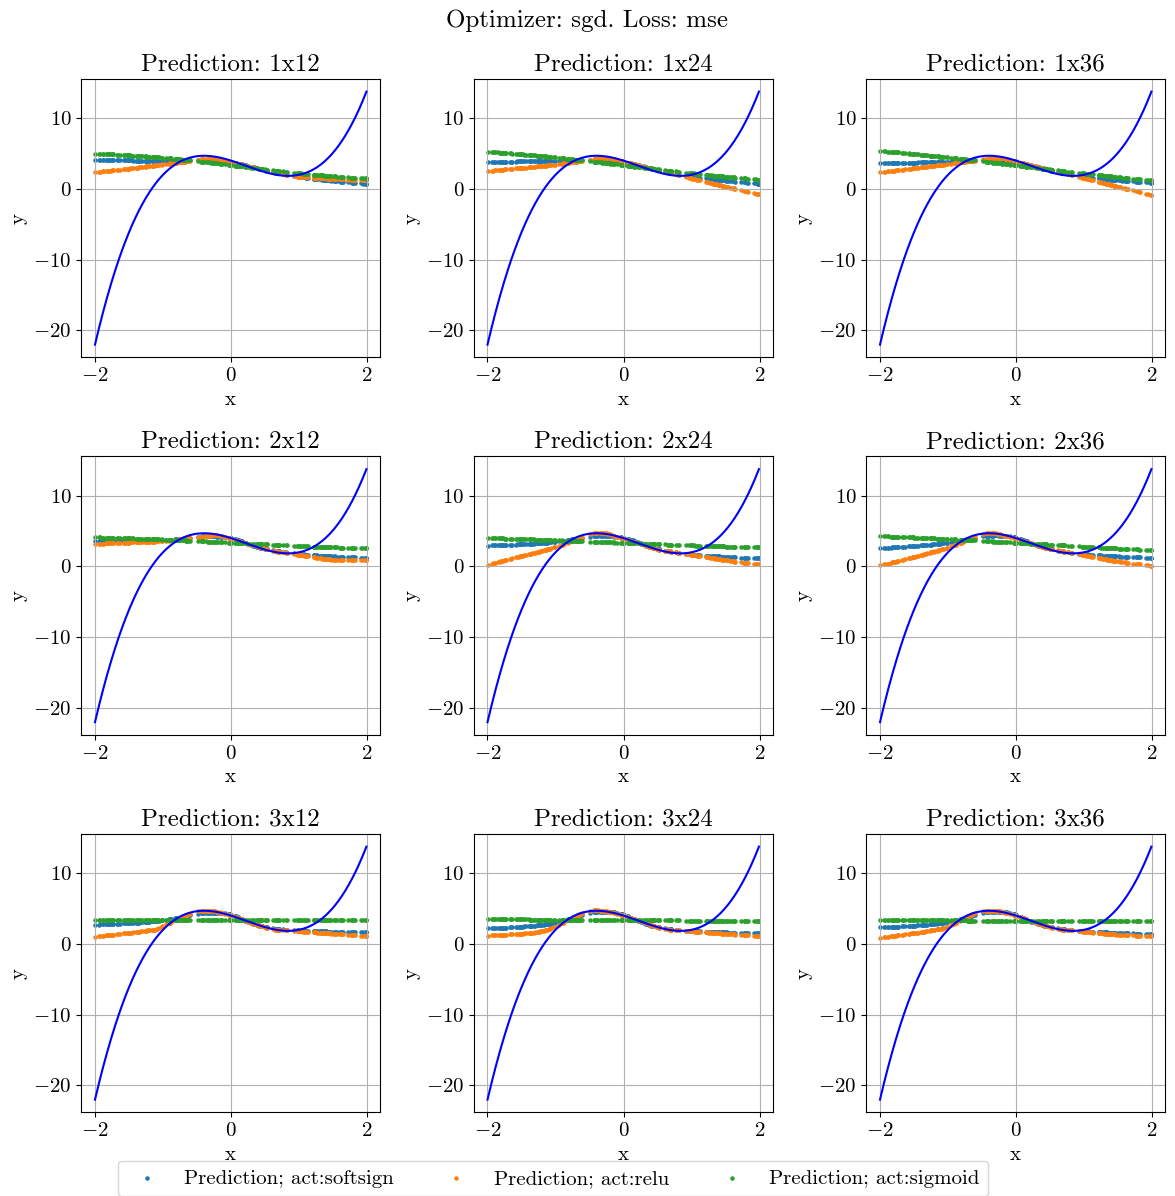

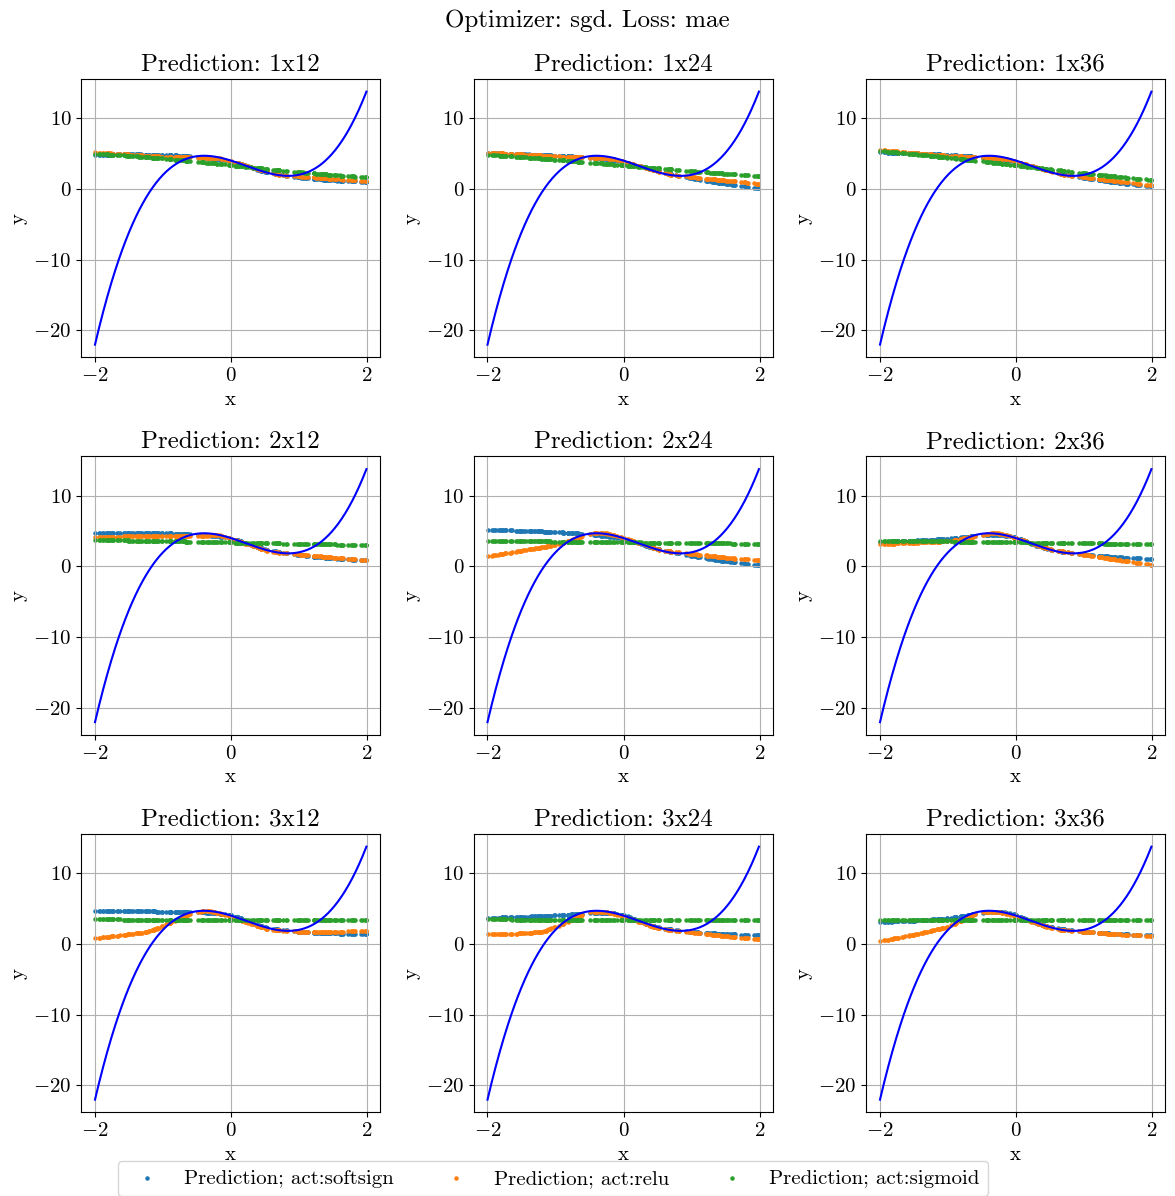

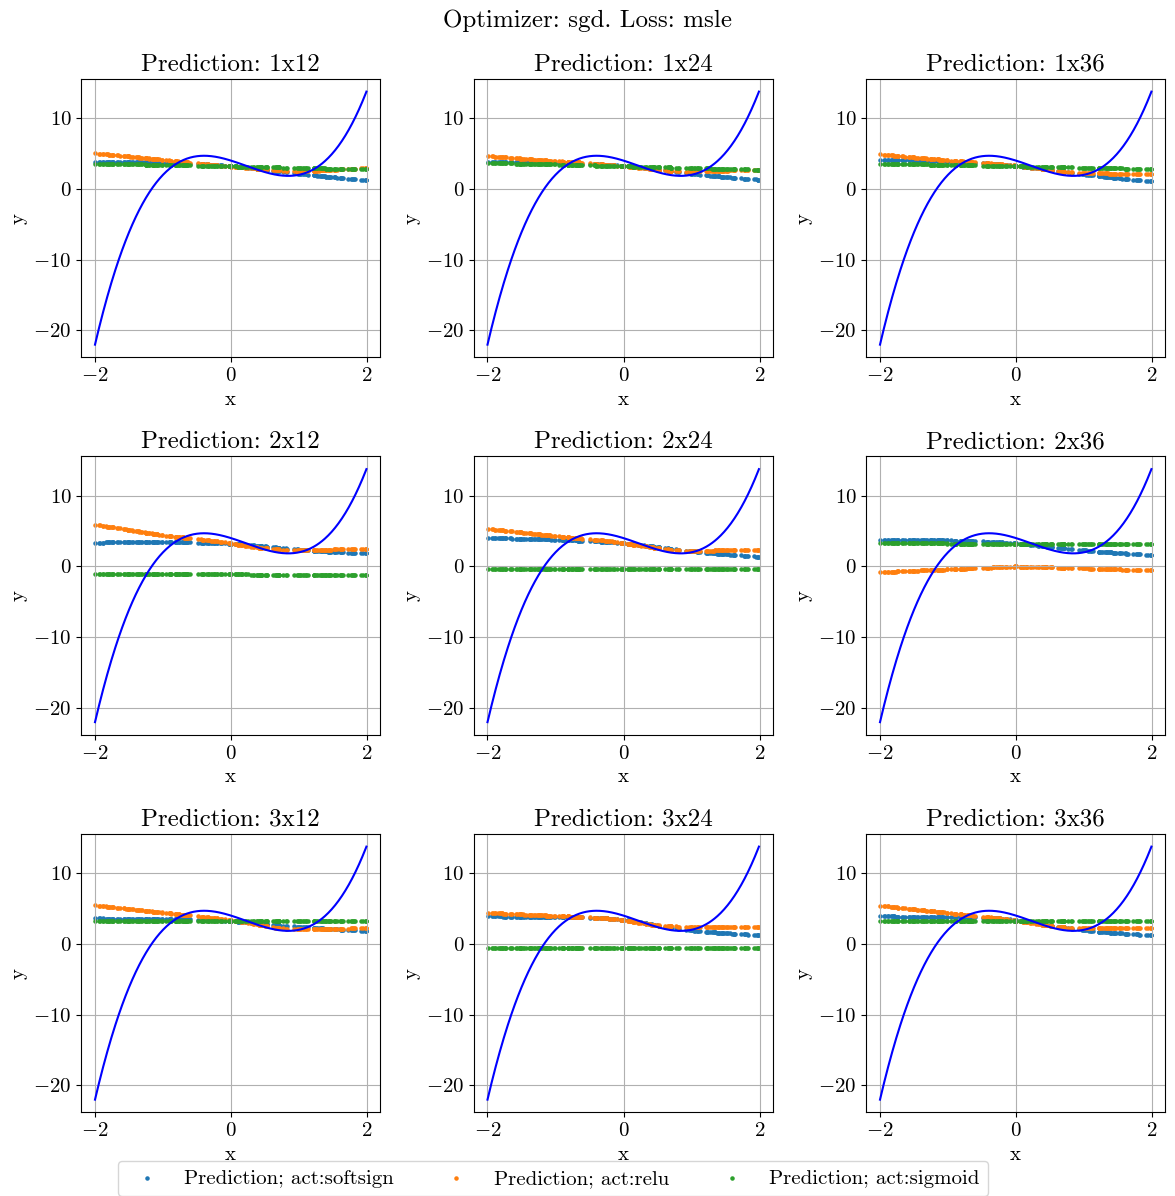

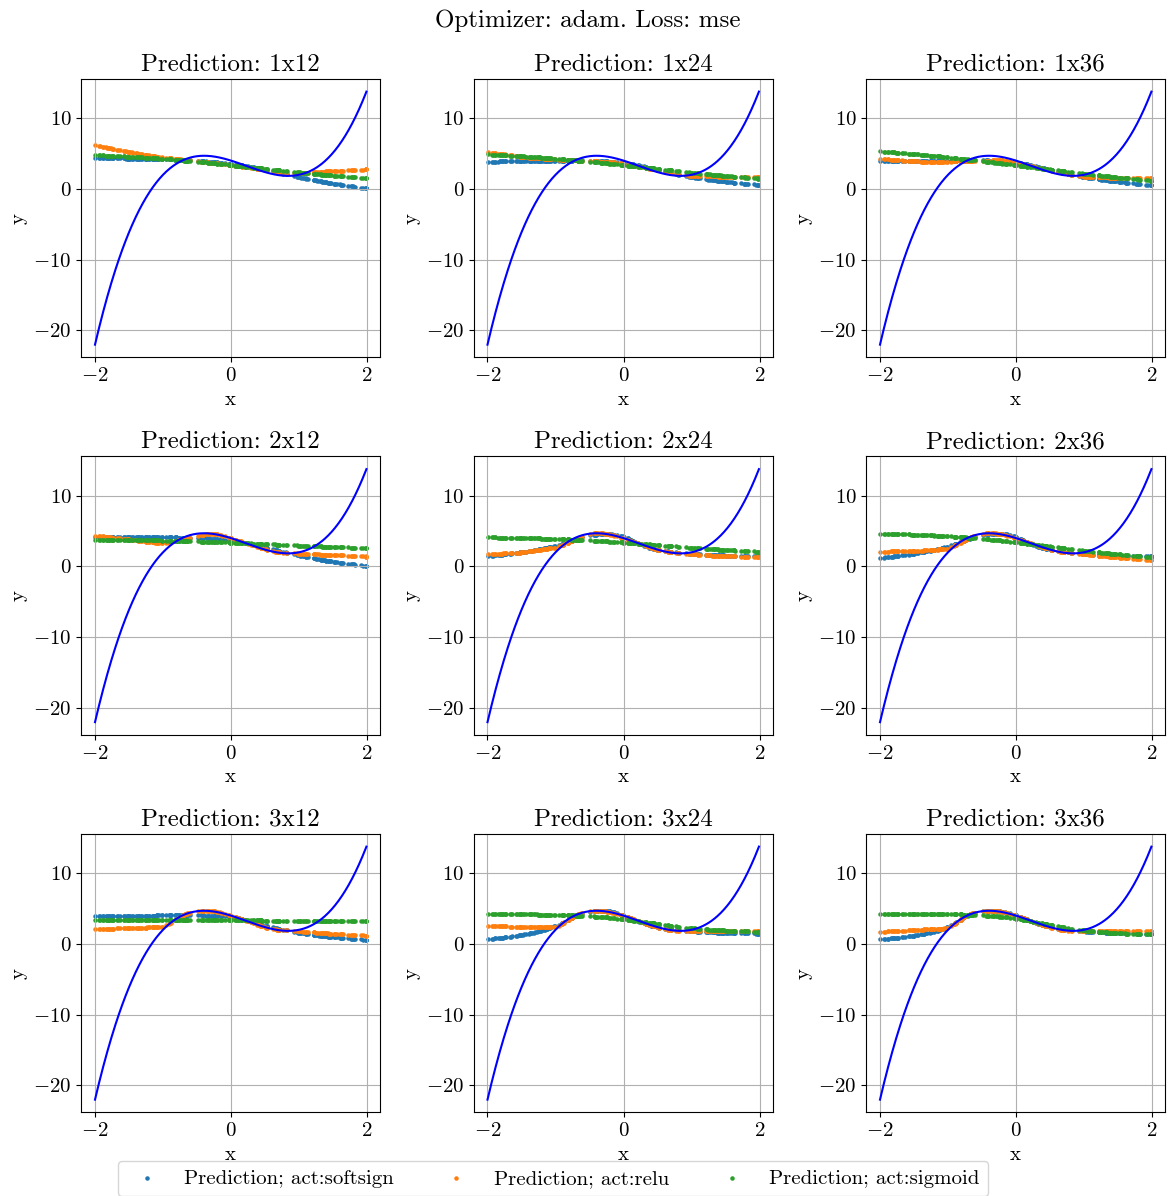

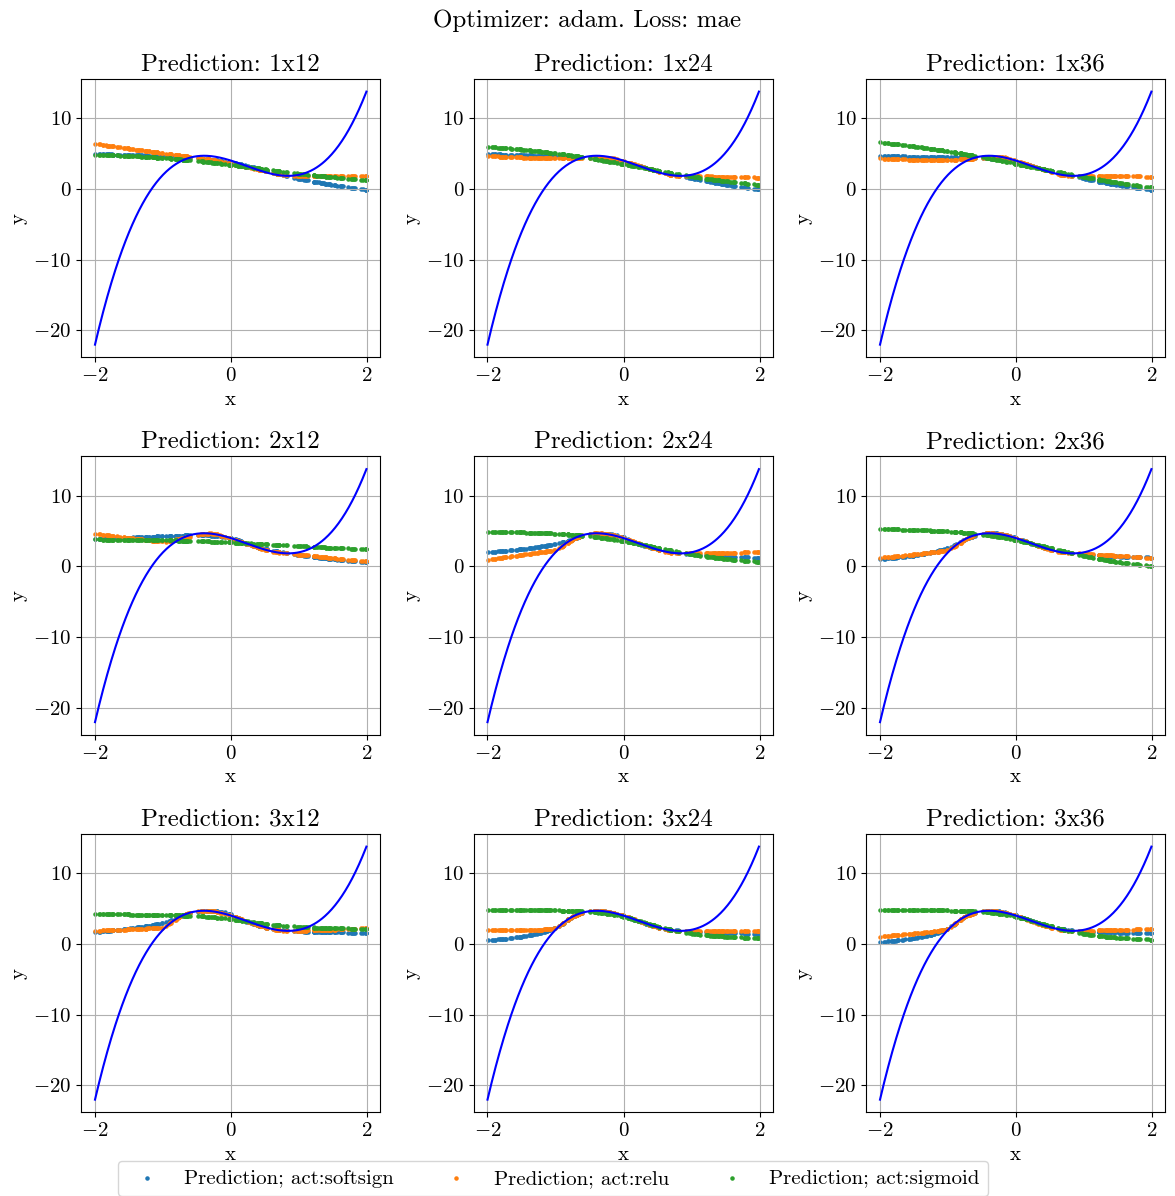

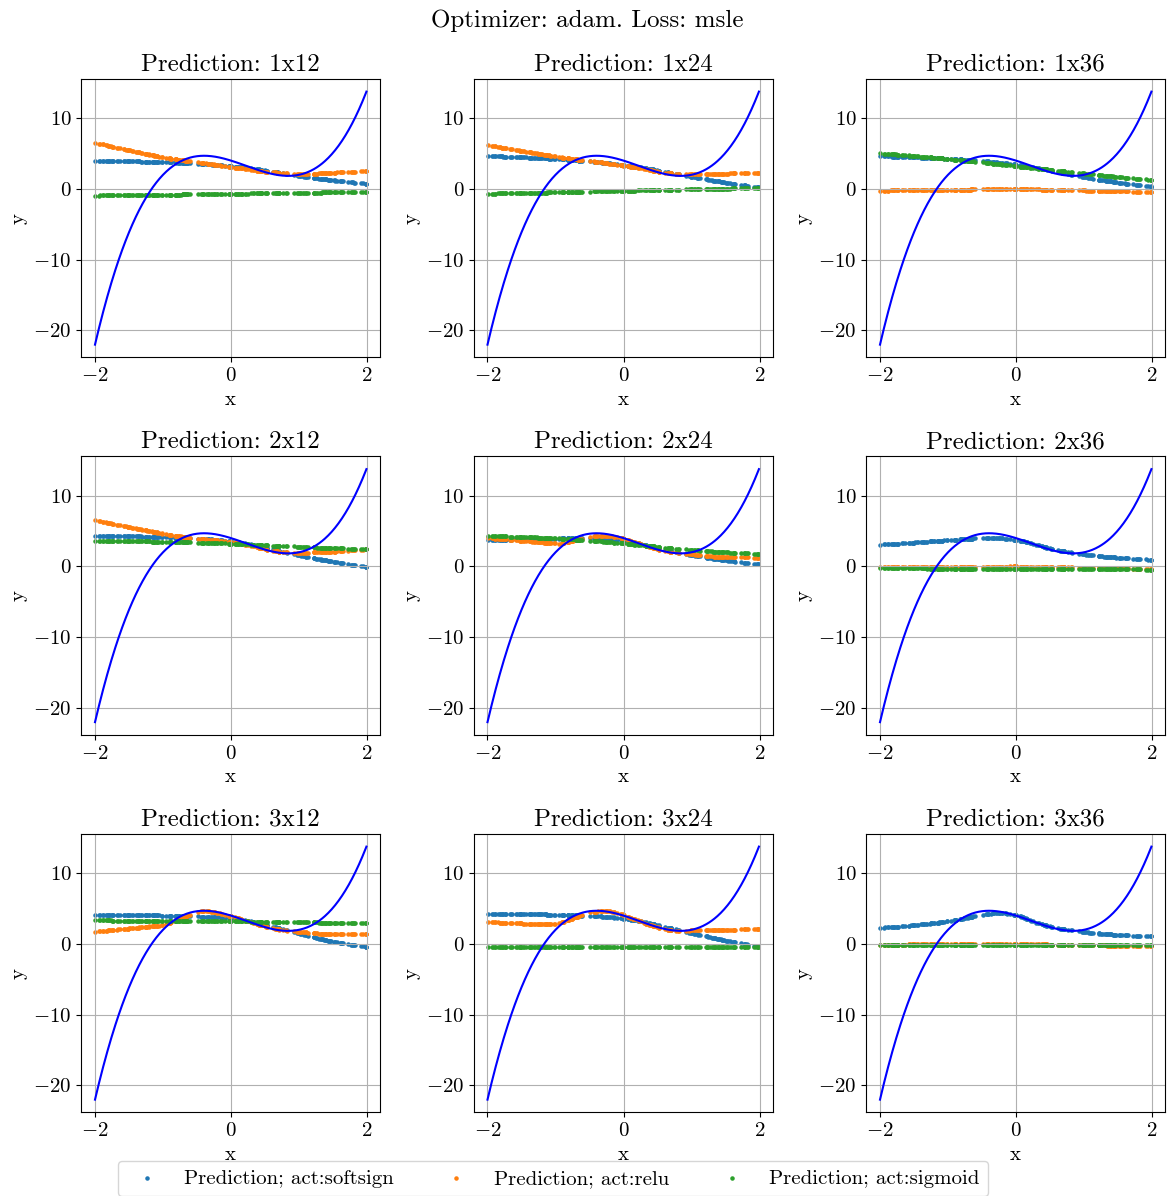

In [231]:
lim = 2
x_pred1 = np.random.uniform(-lim, lim, 200)
y_pred1 = []
x_t= np.arange(-lim,lim,0.01)
y_t= f(x_t)
for i in range(0,l_opt):
    for j in range(0,l_ls):
        plt.figure(figsize=(12,12))
        for k in range(0,l_lay):
            for l in range(0,l_ne):
                plt.subplot(l_lay,l_ne,l_ne*k+l+1)
                for m in range(0,l_act):
                    y_pred1.append([])
                    y_pred1[m] = m1[i][j][k][l][m].predict(x_pred1,verbose=0)
                    if(k==0 and l==0):
                        plt.scatter(x_pred1, y_pred1[m],s=5,label='Prediction; act:'+str(act[m]))
                    else:
                        plt.scatter(x_pred1, y_pred1[m],s=5)
                plt.plot(x_t, y_t,color='b')   
                plt.title('Prediction: '+str(n_lay[k])+'x'+str(n_ne[l]))
                plt.ylabel('y')
                plt.xlabel('x')
                #plt.legend(['Train', 'Test'], loc='best')
                plt.grid()
        plt.figlegend(loc=(0.1,0),ncol=l_act)
        plt.suptitle('Optimizer: '+str(opt[i])+'. Loss: '+str(los[j]))
        plt.tight_layout()
        plt.show()

Osservando l'andamento delle predizioni possiamo confermare il miglior funzionamento dell'ottimizzatore `adam` rispetto a `sgd` e anche constatare la totale inadeguatezza della funzione d'attivazione `sigmoid`.

Notiamo che in generale nessun modello è in grado di predire l'andamento della funzione al di fuori del l'intervallo $[-1,1]$ in cui tutti sono stati allenati e testati.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

---
### Risoluzione
---

Estendo quanto fatto fin ora ad una funzione in due variabili utilizzando gli iper-parametri che si sono dimostrati essere più ragionevoli e aumentando il numero di epoche e di punti di *training* e *test* data la maggior complessità del problema.

In [60]:
def sin2d(x,y):
    return np.sin(x**2 + y**2)
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 5000)
y_train = np.random.uniform(-1.5, 1.5, 5000)
data_train = np.column_stack((x_train, y_train))
#x_train[3000:] = np.random.uniform(0.7,1,2000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
y_valid = np.random.uniform(-1.5, 1.5, 500)
data_valid = np.column_stack((x_valid, y_valid))
#z_target = np.sin(x_valid**2 + y_valid**2)

sigma = 0.05 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(sin2d(x_train,y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(sin2d(x_valid,y_valid), sigma)

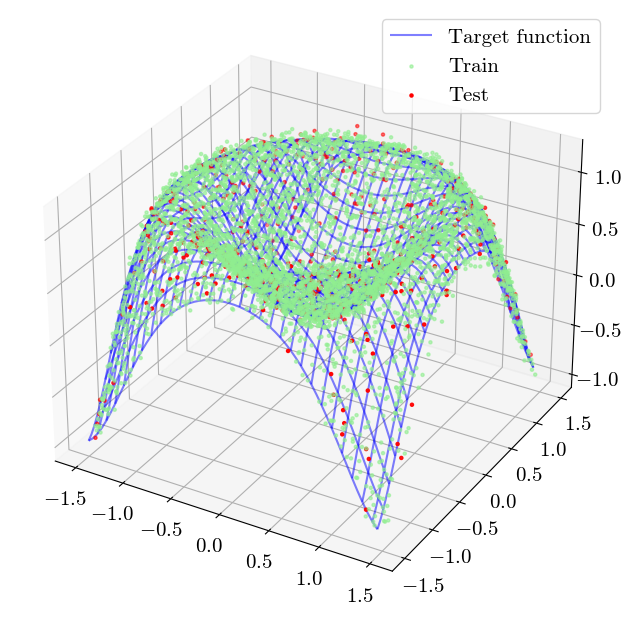

In [61]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
x_surf = np.arange(-1.5, 1.5, 0.05)
y_surf = np.arange(-1.5, 1.5, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, sin2d(X_surf, Y_surf), color='b', alpha=0.5, label = 'Target function')
ax.scatter3D(x_train,y_train,z_train,s=5,color='lightgreen',label='Train',alpha=0.6)
ax.scatter3D(x_valid,y_valid,z_valid,s=5,color='r',label='Test')
#plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid()
plt.show()

In [246]:
m2 = tf.keras.Sequential()

m2.add(Dense(72, input_shape=(2,),activation='softsign'))
m2.add(Dense(48, input_shape=(72,),activation='softsign'))
#m2.add(Dense(48, input_shape=(48,),activation='elu'))

m2.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
m2.compile(optimizer='adam', loss='mae', metrics=['mse'])
m2.summary()

/Users/giovannigalafassi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1354"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3649 (Dense)              │ (None, 72)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3650 (Dense)              │ (None, 48)             │         3,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3651 (Dense)              │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,769 (14.72 KB)

 Trainable params: 3,769 (14.72 KB)

 Non-trainable params: 0 (0.00 B)

In [247]:
h2 = m2.fit(x=data_train,y=z_train, 
          batch_size=32, epochs=300,
          shuffle=True, 
          validation_data=(data_valid,z_valid),verbose=0)


In [237]:
m2.save('sin.keras')

In [64]:
m2 = keras.models.load_model('sin.keras')

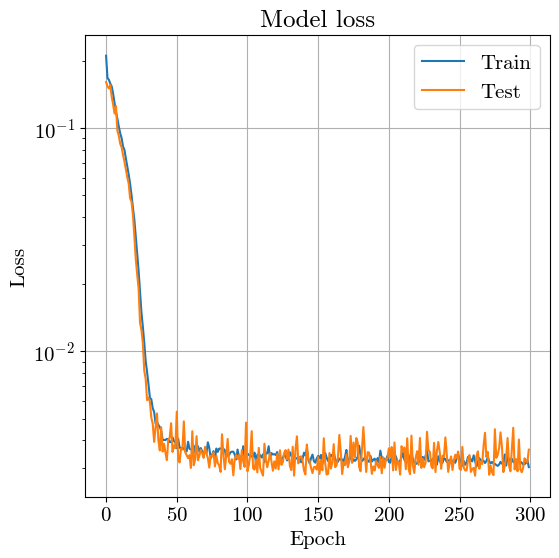

In [260]:
plt.plot(h2.history['mse'])
plt.plot(h2.history['val_mse'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.yscale('log')
plt.show()

Il modello raggiunge una buona **Loss** e le predizioni, finchè nell'intervallo di allenamento della rete, sono buone

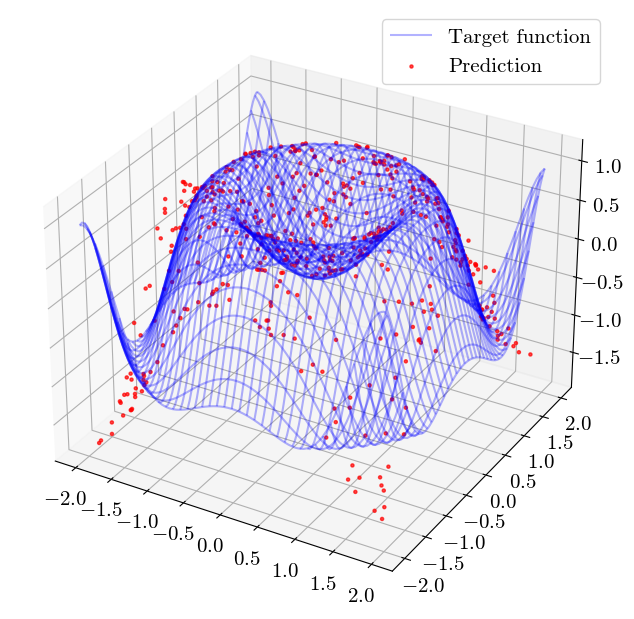

In [249]:
lim = 2
x_predicted = np.random.uniform(-lim, lim, 500)
y_predicted = np.random.uniform(-lim, lim, 500)
data_p = np.column_stack((x_predicted,y_predicted))
z_predicted = m2.predict(data_p,verbose=0)
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
x_surf = np.arange(-lim, lim, 0.05)
y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, sin2d(X_surf, Y_surf), color='b', alpha=0.3, label = 'Target function')
ax.scatter3D(x_predicted,y_predicted,z_predicted,color='r',s=5,label='Prediction',alpha=0.7)
#plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid()
plt.show()

Mostro anche un'*appiattimento* del problema per mostrare la discrepanza quando la predizione viene estesa al di fuori della regione di allenamento.

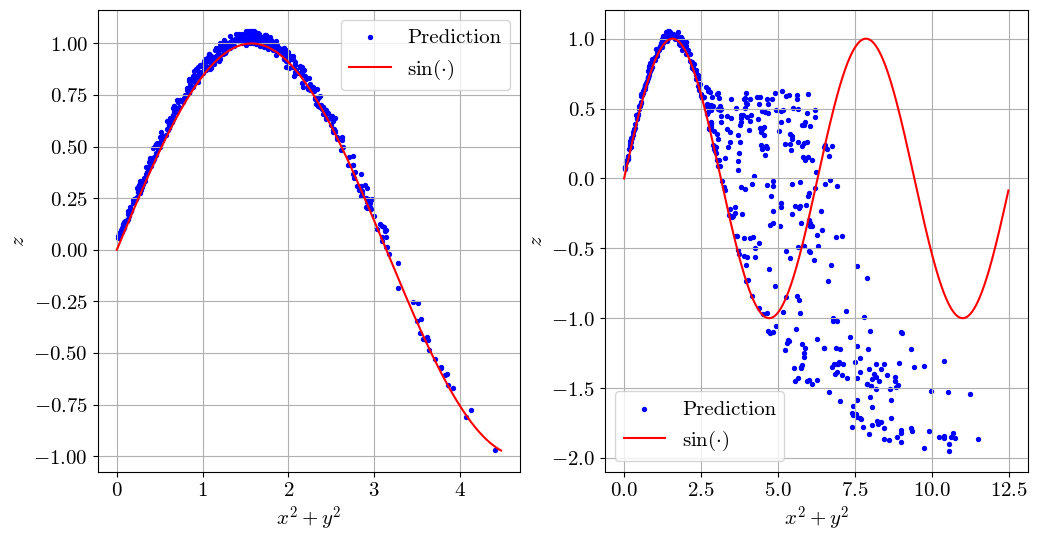

In [250]:

plt.figure(figsize=(12,6))
for i in range(0,2):
    plt.subplot(1,2,i+1)
    lim = 1.5 + i
    x_predicted = np.random.uniform(-lim, lim, 500)
    y_predicted = np.random.uniform(-lim, lim, 500)
    data_p = np.column_stack((x_predicted,y_predicted))
    z_predicted = m2.predict(data_p,verbose=0)
    arg = x_predicted**2 + y_predicted**2
    plt.scatter(arg,z_predicted,s=8,color='b',label='Prediction')
    w = np.arange(0,2*lim**2,0.02)
    plt.plot(w,np.sin(w),color='r',label='$\sin(\cdot)$')
    plt.xlabel('$x^2+y^2$')
    plt.ylabel('$z$')
    plt.legend()
    plt.grid()


Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>